<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Ignacio Andrés Aedo Villagra ; 201773556-2 ; Malla Nueva </h4>
    <h4> Ethiel Andrés Carmona Contalba ; 201773533-3 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Abril 2019</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

## 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset 

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 


En el siguiente algoritmo se procesan los datos del archivo, creando un diccionario donde el subreddit es la llave y tiene asociado el número de comentarios sarcásticos y no sarcásticos. Finalmente, se selecciona el primer subreddit cuyo número de comentarios sarcásticos y no sarcásticos supere el 70%, respectivamente.

In [1]:
import csv
import matplotlib.pyplot as plt
dic = {}
datos=[]
#creamos un diccionario donde la llave será el subreddit y los valores el numero de comentarios sarcásticos y no sarcásticos
with open('reddit.csv','r') as file:
    archivo=csv.reader(file)
    for linea in archivo:
        if (linea[3] not in dic):
            if (linea[0] == "0"):
                dic[linea[3]] = [1,0]
            else:
                dic[linea[3]] = [0,1]
        else:
            if (linea[0] == "0"):
                dic[linea[3]][0] += 1
            else:
                dic[linea[3]][1] += 1
del dic['subreddit']
k=0
#tomamos los primeros subreddits que tengan una predominancia del mayor al 70%
for llave in dic:
    total_comentarios=dic[llave][0]+dic[llave][1]
    sarcasticos=dic[llave][1]
    noSarcasticos=dic[llave][0]
    if((sarcasticos/total_comentarios)>0.7 and k==0):
        print("En el subreddit "+llave+" hay "+str(dic[llave][0])+" comentarios no sarcásticos y "+str(dic[llave][1])+" comentarios sarcásticos, por lo tanto dominan los comentarios sarcásticos ya que corresponden a más del 70% del total.")
        k=1
    elif((noSarcasticos/total_comentarios)>0.7 and k==1):
         print("En el subreddit "+llave+" hay "+str(dic[llave][0])+" comentarios no sarcásticos y "+str(dic[llave][1])+" comentarios sarcásticos, por lo tanto dominan los comentarios no sarcásticos ya que corresponden a más del 70% del total.")
         k=2
    if(k==2):
        break

En el subreddit tiltshift hay 2 comentarios no sarcásticos y 5 comentarios sarcásticos, por lo tanto dominan los comentarios sarcásticos ya que corresponden a más del 70% del total.
En el subreddit sneakermarket hay 14 comentarios no sarcásticos y 3 comentarios sarcásticos, por lo tanto dominan los comentarios no sarcásticos ya que corresponden a más del 70% del total.


>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

Utilizando el diccionario creado en el inciso a), se guarda en listas aquellos subreddits más sarcásticos y no sarcásticos, respectivamente, procurando guardarlos del más grande al más pequeño. Para esto, se busca el subreddit con más comentarios sarcásticos o no sarcásticos, se agrega a la lista y se elimina del diccionario. Finalmente, se imprime el resultado.

In [2]:
d=dict(dic)
redditSarcastico=[]
redditNoSarcastico=[]
redditMas=''
i=0 
#creamos dos listas de tuplas, con el subreddit y su cantidad de comentarios
#una con los subreddits con más comentarios sarcásticos y otra lista con los subreddits con más comentarios no sarcásticos
while(i<10):
    cont=-1
    for llave in dic:   
        if(dic[llave][0]>cont):
            redditMas=llave
            cont=dic[llave][0]
    redditNoSarcastico.append((redditMas,cont))
    del dic[redditMas]
    i+=1
i=0
while(i<10):
    cont=-1
    for llave in d:   
        if(d[llave][1]>cont):
            redditMas=llave
            cont=d[llave][1]
    redditSarcastico.append((redditMas,cont))
    del d[redditMas]
    i+=1
i=1
#printeamos los resultados
print("Top 10 subreddits con mayor cantidad de comentarios sarcásticos")
for r in redditSarcastico:
    reddit,num=r
    print(str(i)+".-"+reddit+": con "+str(num)+" comentarios sarcásticos")
    i+=1
print("\n")
print("Top 10 subreddits con mayor cantidad de comentarios no sarcásticos")
i=1
for r in redditNoSarcastico:
    reddit,num=r
    print(str(i)+".-"+reddit+": con "+str(num)+" comentarios no sarcásticos")
    i+=1

Top 10 subreddits con mayor cantidad de comentarios sarcásticos
1.-AskReddit: con 26367 comentarios sarcásticos
2.-politics: con 23910 comentarios sarcásticos
3.-worldnews: con 16948 comentarios sarcásticos
4.-leagueoflegends: con 11409 comentarios sarcásticos
5.-pcmasterrace: con 10760 comentarios sarcásticos
6.-news: con 10193 comentarios sarcásticos
7.-funny: con 8099 comentarios sarcásticos
8.-pics: con 7825 comentarios sarcásticos
9.-todayilearned: con 7754 comentarios sarcásticos
10.-GlobalOffensive: con 7586 comentarios sarcásticos


Top 10 subreddits con mayor cantidad de comentarios no sarcásticos
1.-AskReddit: con 39310 comentarios no sarcásticos
2.-politics: con 15586 comentarios no sarcásticos
3.-funny: con 9840 comentarios no sarcásticos
4.-leagueoflegends: con 9628 comentarios no sarcásticos
5.-worldnews: con 9429 comentarios no sarcásticos
6.-pics: con 8329 comentarios no sarcásticos
7.-pcmasterrace: con 8228 comentarios no sarcásticos
8.-nfl: con 6935 comentarios no sar

Existen ciertas similitudes entre ambos top debido a que los subreddits más comentados son los que tienden a tener más comentarios. Al tener un gran volumen de comentarios, ambos sarcásticos y no sarcásticos predominan por sobre otros subreddits. Podemos decir también que estos subreddits tienen una cantidad parecida de comentarios sarcásticos y no sarcásticos dada la naturaleza del tópico del subreddit, por ejemplo, videojuegos.

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

En el siguiente algoritmo, agrupamos cada año presente en el archivo reddit.csv en un diccionario cuyos valores correponden a una lista con el número de comentarios no sarcásticos y sarcásticos, respectivamente. Teniendo estos datos, se puede realizar la línea de tiempo donde el eje de las abscisas correponde a los años en los que se emitieron los comentarios y el eje de las ordenadas a la cantidad de comentarios en ese momento en el tiempo.

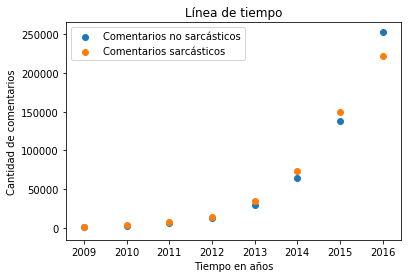

In [3]:
dicFechas={} #forma {'año':[votoNoSarcástico,votoSarcástico],...,}
x=[]
yNoSarcasticos=[]
ySarcasticos=[]
#creamos el diccionario de la forma {'año':[votoNoSarcástico,votoSarcástico],...,}
with open('reddit.csv','r') as file:
    archivo=csv.reader(file)
    for linea in archivo:
        fecha=linea[7].split('-')[0]
        if (fecha not in dicFechas):
            if (linea[0] == "0"): #no sarcasticos
                dicFechas[fecha] = [1,0]
            else:
                dicFechas[fecha] = [0,1]
        else:
            if (linea[0] == "0"):
                dicFechas[fecha][0] += 1
            else:
                dicFechas[fecha][1] += 1
del dicFechas['date']
#agrupamos los datos en las listas correspondientes, los cuales están ordenados por posición
for fecha,valores in dicFechas.items():
    x.append(fecha)
    yNoSarcasticos.append(valores[0])
    ySarcasticos.append(valores[1])
x.reverse()
yNoSarcasticos.reverse()
ySarcasticos.reverse()
#printeamos los datos en gráficos
plt.scatter(x,yNoSarcasticos,label='Comentarios no sarcásticos')
plt.scatter(x,ySarcasticos,label='Comentarios sarcásticos')
plt.xlabel('Tiempo en años')
plt.ylabel('Cantidad de comentarios')
plt.title('Línea de tiempo')
plt.legend()
plt.show()

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

Se recojen los datos que se analizarán para luego graficarlos.

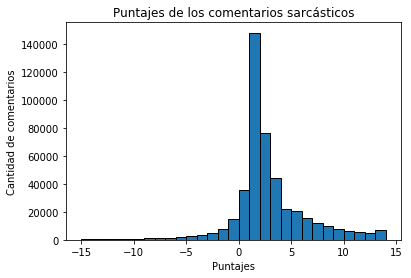

In [4]:
scoresSarcasticos=[] #listas con los datos a graficar
scoresNoSarcasticos=[]
k=0
#creamos listas con los puntajes a graficar
with open('reddit.csv','r') as file:
    archivo=csv.reader(file)
    for linea in archivo:
        if(k==1):
            if(int(linea[0])==0):
                scoresNoSarcasticos.append(int(linea[4]))
            else:
                scoresSarcasticos.append(int(linea[4]))
        k=1

plt.title('Puntajes de los comentarios sarcásticos')
plt.xlabel('Puntajes')
plt.ylabel('Cantidad de comentarios')
plt.hist(scoresSarcasticos,range(-15,15),edgecolor='black')
plt.show()

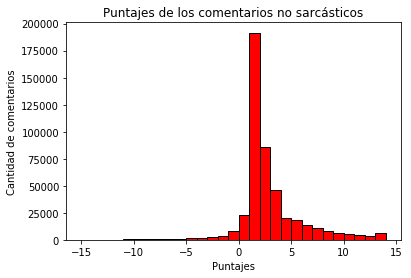

In [5]:
#creamos e imprimimos el gráfico
plt.title('Puntajes de los comentarios no sarcásticos')
plt.xlabel('Puntajes')
plt.ylabel('Cantidad de comentarios')
plt.hist(scoresNoSarcasticos,range(-15,15),edgecolor='black',color='r')
plt.show()

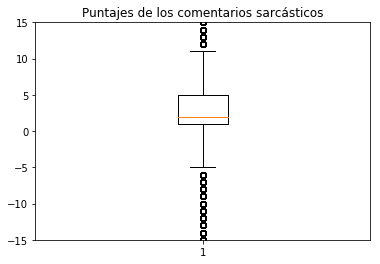

In [6]:
#creamos e imprimimos el gráfico
axes = plt.gca()
axes.set_ylim([-15,15])
plt.title('Puntajes de los comentarios sarcásticos')
plt.boxplot(scoresSarcasticos)
plt.show()

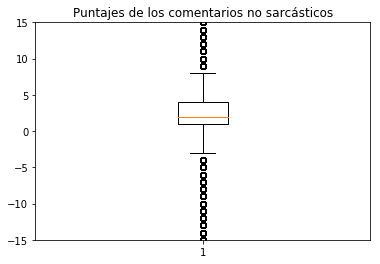

In [7]:
#creamos e imprimimos el gráfico
axes = plt.gca()
axes.set_ylim([-15,15])
plt.title('Puntajes de los comentarios no sarcásticos')
plt.boxplot(scoresNoSarcasticos)
plt.show()

#### Conclusiones
Al observar los histogramas, queda clara la distribución de los datos y se puede decir que comentarios tanto sarcásticos como no sarcásticos se comportan de manera similar y la mayoría de los puntajes están entre los valores 0 y 5. Sin embargo, al observar los boxplots, éstos entregan información adicional: existe una gran cantidad de valores atípicos (outliers) en la muestra, lo cual cobra sentido al considerar el sistema de votos del sitio Reddit, el cual expone los comentarios más votados, permitiendo asi que más gente los vea y por lo tanto tenga más posibilidades de ser votado.

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

A continuación se presenta el algoritmo para resolver el problema.

Para 10 agujas:
La probabilidad de que una aguja atraviese una linea horizontal es: 0.4


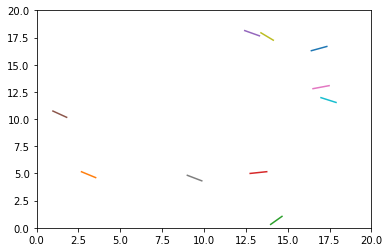

La distribución es: 


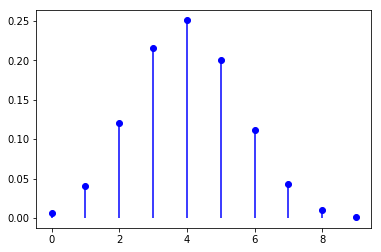

Para 100 agujas:
La probabilidad de que una aguja atraviese una linea horizontal es: 0.76


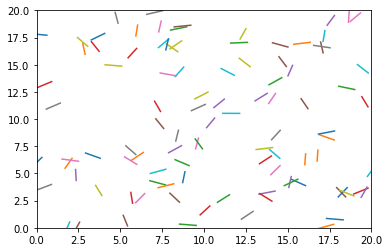

La distribución es: 


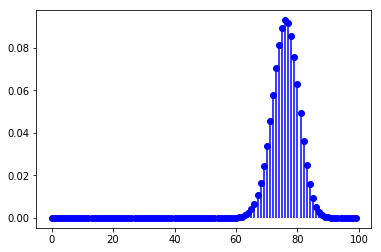

Para 1000 agujas:
La probabilidad de que una aguja atraviese una linea horizontal es: 0.647


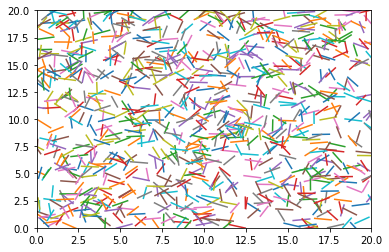

La distribución es: 


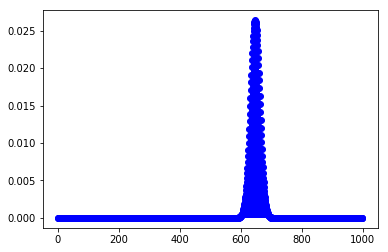

Para 10000 agujas:
La probabilidad de que una aguja atraviese una linea horizontal es: 0.6388


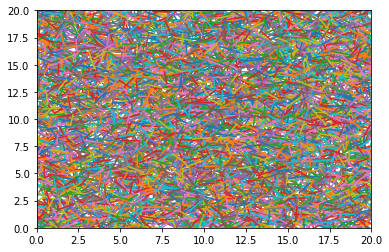

La distribución es: 


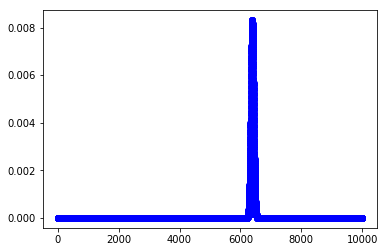

KeyboardInterrupt: 

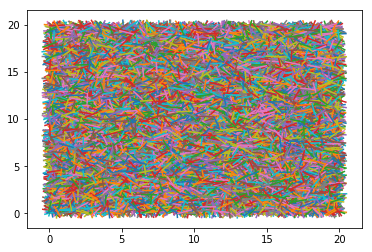

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import scipy.stats as ss 

largoAguja = 1.0
nLineas = 20

#función: procesamiento
#Parámetro:
# n: entero el cual indica la cantidad de agujas a tratar
#Resumen:
# Almacena el valor de la aguja para el gráfico y retorna la cantidad de agujas que tocan una línea horizontal
def procesamiento(n):
    cant = 0.0
    for aguja in range(n):
        #Centroide y ángulo de la aguja
        x = uniform(0, nLineas)
        y = uniform(0, nLineas)
        angulo = uniform(0, 180)
        
        #Valores de componentes x e y de la mitad de la aguja, por trigonometría
        dx = (largoAguja/2)*math.cos(math.radians(angulo))
        dy = (largoAguja/2)*math.sin(math.radians(angulo))
        
        #Líneas del nivel superior e inferior que la aguja puede tocar
        ymax = int(y)+1
        ymin = int(y)
        masCercano = min(ymax-y, y-ymin)    
        if (dy >= masCercano):
            cant += 1.0    
            
        #Obtención de las coordenadas de la aguja
        #Xinicial/final, Yinicial/final
        if (angulo >= 0 and angulo <= 90):
            xf, yf = x + dx, y + dy
            xi, yi = x - dx, y - dy
            plt.plot([xi, xf], [yi, yf])        
        else:
            xf, yf = x - dx, y - dy
            xi, yi = x + dx, y + dy
            plt.plot([xi, xf], [yi, yf])
    return cant

        
#Se obtiene la probabilidad para cada n, donde n será 10, 100, 1000, 10000, 100000, dividiendo en dicho valor
#Se procede a mostrar el gráfico de las agujas en torno a un ambiente de 20x20
probabilidad10 = procesamiento(10)/10.0
print("Para 10 agujas:")
print("La probabilidad de que una aguja atraviese una linea horizontal es: " + str(probabilidad10))
plt.axis([0,nLineas,0,nLineas])
plt.show()
#Calculo de distribución binomial
x = np.arange(10)
X = ss.binom(10, probabilidad10)
plt.plot(x, X.pmf(x), "bo")
plt.vlines(x, 0, X.pmf(x), "b")
print("La distribución es: ")
plt.show()



probabilidad100 = procesamiento(100)/100.0
print("Para 100 agujas:")
print("La probabilidad de que una aguja atraviese una linea horizontal es: " + str(probabilidad100))
plt.axis([0,nLineas,0,nLineas])
plt.show()

x = np.arange(100)
X = ss.binom(100, probabilidad100)
plt.plot(x, X.pmf(x), "bo")
plt.vlines(x, 0, X.pmf(x), "b")
print("La distribución es: ")
plt.show()



probabilidad1000 = procesamiento(1000)/1000.0
print("Para 1000 agujas:")
print("La probabilidad de que una aguja atraviese una linea horizontal es: " + str(probabilidad1000))
plt.axis([0,nLineas,0,nLineas])
plt.show()

x = np.arange(1000)
X = ss.binom(1000, probabilidad1000)
plt.plot(x, X.pmf(x), "bo")
plt.vlines(x, 0, X.pmf(x), "b")
print("La distribución es: ")
plt.show()



probabilidad10000 = procesamiento(10000)/10000.0
print("Para 10000 agujas:")
print("La probabilidad de que una aguja atraviese una linea horizontal es: " + str(probabilidad10000))
plt.axis([0,nLineas,0,nLineas])
plt.show()

x = np.arange(10000)
X = ss.binom(10000, probabilidad10000)
plt.plot(x, X.pmf(x), "bo")
plt.vlines(x, 0, X.pmf(x), "b")
print("La distribución es: ")
plt.show()



probabilidad100000 = procesamiento(100000)/100000.0
print("Para 100000 agujas:")
print("La probabilidad de que una aguja atraviese una linea horizontal es: " + str(probabilidad100000))
plt.axis([0,nLineas,0,nLineas])
plt.show()

x = np.arange(100000)
X = ss.binom(100000, probabilidad100000)
plt.plot(x, X.pmf(x), "bo")
plt.vlines(x, 0, X.pmf(x), "b")
print("La distribución es: ")
plt.show()

Como se puede apreciar en los gráficos de las agujas, se observa la distribución de estas en todo el espacio de 20x20 unidades.
Por otra parte, el valor teórico perteneciente a la probabilidad de que una aguja atraviese alguna línea horizontal es de 2/π.
A medida que vamos aumentando la cantidad de agujas (n), la probabilidad experimental se acerca considerablemente al valor presentado anteriormente.
Esto se puede apreciar viendo el segundo gráfico (distribución), el cual, para valores pequeños de n tiende a ser considerablemente variable respecto al valor teórico, mientras que para valores mas grandes se tiende a estabilizar y bordear el valor aproximado 0.64.

### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

La matriz de transición se obtiene a través del enunciado. El estado inicial se calcula utilizando los datos entregados, los cuales permiten calcular el pocentaje (de un total de 400 personas) perteneciente a cada compañía.

In [9]:
import numpy as np
#creamos las matrices
matrizTransicion = np.array([[0.65,0.2,0.15],[0.3,0.4,0.3],[0.1,0.2,0.7]])
matrizInicial= np.array([[0.5,0.45,0.05]])
print("La matriz de Transición en sus filas y columnas tiene los valores correspondientes a \"Sansafood\", \"Lds ltda\" y \"Wenzi's\" respectivamente:\n",matrizTransicion)
print("La matriz de estado inicial tiene los valores de \"Sansafood\", \"Lds ltda\" y \"Wenzi's\" respectivamente:\n",matrizInicial)

La matriz de Transición en sus filas y columnas tiene los valores correspondientes a "Sansafood", "Lds ltda" y "Wenzi's" respectivamente:
 [[0.65 0.2  0.15]
 [0.3  0.4  0.3 ]
 [0.1  0.2  0.7 ]]
La matriz de estado inicial tiene los valores de "Sansafood", "Lds ltda" y "Wenzi's" respectivamente:
 [[0.5  0.45 0.05]]


>**O:** b) Haga un diagrama de transición 

El diagrama de transición de la situación planteada:

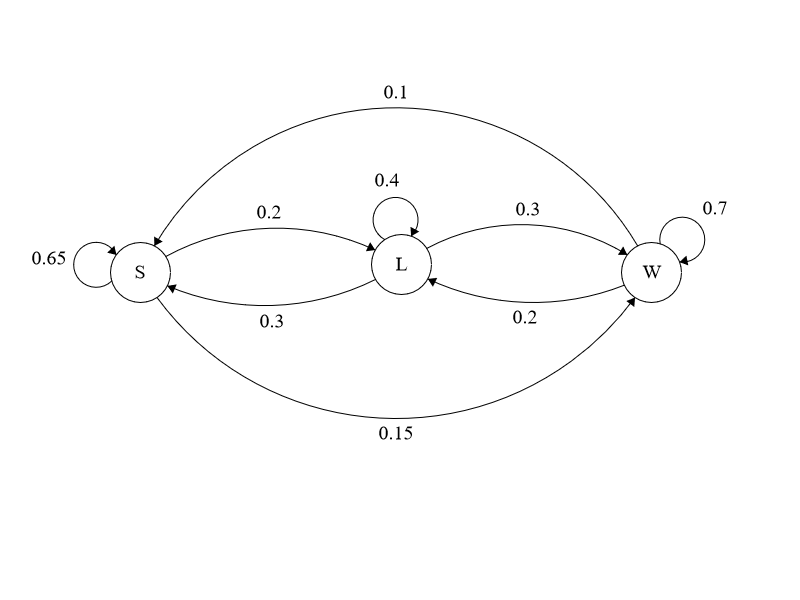

Donde S es "Sansafood", L es "LDS ltda" y W corresponde a "Wenzi's".

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

Una cadena de markov se dice regular si su matriz de transición es regular, lo que quiere decir que alguna potencia de la matriz tiene todas sus entradas positivas (distintas de 0). Una propiedad de las cadenas regulares es que tienen matriz estacionaria.

In [10]:
print(np.matmul(matrizTransicion,matrizTransicion))

[[0.4975 0.24   0.2625]
 [0.345  0.28   0.375 ]
 [0.195  0.24   0.565 ]]


Como podemos observar, nuestra matriz de transición tiene todos sus valores distintos de cero al elevarla al cuadrado, lo que significa que es una cadena de markov regular.

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

Como se probó en el inciso c), la matriz es regular y, por lo tanto, tiene matriz estacionaria.
Para encontrar la matriz estacionaria se diseñará un algoritmo que avanzará a través de los estados hasta llegar a un estado que se repita, osea, el estado estacionario.

In [11]:
i=0
matrizEstado=np.matmul(matrizInicial,matrizTransicion)
matrizAnterior=matrizEstado
#iteramos multiplicando las matrices hasta llegar a la matriz estacionaria
while(i<1000):
    matrizEstado=np.matmul(matrizEstado,matrizTransicion)
    if(np.array_equal(matrizAnterior,matrizEstado)):
        print("La matriz estacionaria corresponde a \n Sansafood    LDS ltda     Wenzi's\n",matrizEstado)
        i=1001
    matrizAnterior=matrizEstado
    i+=1

La matriz estacionaria corresponde a 
 Sansafood    LDS ltda     Wenzi's
 [[0.33333333 0.25       0.41666667]]


>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

Sabemos que la matriz de estado nos entrega los porcentajes de la cantidad de personas pertenecientes a cada compañía de comida rápida en cada momento del tiempo, por lo tanto, con los datos entregados por esta matriz podemos estimar quien tendrá la mayor cantidad de clientes.

In [12]:
i=0
matrizEstado=np.matmul(matrizInicial,matrizTransicion)
matrizAnterior=matrizEstado
#iteramos multiplicando las matrices hasta llegar a la matriz estacionaria
while(i<1000):
    matrizEstado=np.matmul(matrizEstado,matrizTransicion)
    if(np.array_equal(matrizAnterior,matrizEstado)):
        print("La cantidad de personas pasado mucho tiempo corresponde a:")
        print("Sansafood tendrá:",matrizEstado[0][0]*200,"personas")
        print("LDS ltda tendrá:",matrizEstado[0][1]*200,"personas")
        print("Wenzi's tendrá:",matrizEstado[0][2]*200,"personas")
        i=1001
    matrizAnterior=matrizEstado
    i+=1

La cantidad de personas pasado mucho tiempo corresponde a:
Sansafood tendrá: 66.66666666666671 personas
LDS ltda tendrá: 50.00000000000002 personas
Wenzi's tendrá: 83.33333333333334 personas


El resultado mostrado por el algoritmo refleja las mismas cantidades que se obtendrían en d) al multiplicar la población total por la matriz estacionaria, ya que esta matriz nos entrega los porcentajes de cada empresa después de mucho tiempo.
Por lo tanto, podemos concluir que Wenzi's tendrá la mayor cantidad de personas.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)